# ABSTRACT

The aim of this project is to examine the grades of students across different levels, including Less than HS, HS, Jr Coll, Bachelor's, and Graduate. We intend to use ANOVA analysis, a statistical tool that identifies significant differences in variance between independent groups of data. By comparing the means of these five classes, we hope to better understand how grades vary across different educational levels.
To accomplish this, we started with a null hypothesis stating that the differences in means were not significant, and an alternative hypothesis stating that they were. We used one-way ANOVA due to the number of independent variables at hand, which allowed us to explore the relationship between the independent and dependent variables.
To calculate the F ratio, we conducted F tests using ANOVA. If the F ratio is close to 1, this indicates that the numerator and denominator are similar, meaning that there is no true variance in the data. On the other hand, if the value of F ratio is less than 1, this indicates significant variance. Based on the F test results, we can either accept or reject the null hypothesis and proceed accordingly with the data. By analyzing the results of the ANOVA, we can gain valuable insights into how grades differ across different levels.

# THEORY

Several statistical tests were at our disposal to conduct hypothesis testing. The aim of these tests is to ascertain if there   exists a significant association between the feature variable and the target variable or, in this instance, to recognize and     measure the variance between group means.
  
TEST STATISTICS: 

In hypothesis testing, the null hypothesis is assumed to state that there is no significant relationship between the two sets    of data being analyzed. An alternative hypothesis is constructed to prove the opposite. Statistical tests are then used to calculate a test statistic, which helps to quantify the deviation from the null hypothesis. The p-value is used to estimate the probability of a difference between the two sets of data, assuming that the null hypothesis is true. Depending on the significance level chosen at the outset, we can either reject or fail to reject the null hypothesis, based on the evidence gathered from the statistical test.

Before performing a statistical test, certain assumptions must be considered. Firstly, the data, observations, or variables being analyzed must not have any form of autocorrelation. Secondly, each group being analyzed must have similar variances to the other groups, so that the test can be effective. Thirdly, the data should resemble a normal distribution, as this allows for easier analysis.

There are various statistical tests available for hypothesis testing, such as the z statistic test, t statistic test, chi-squared test, paired and independent t-tests. However, in datasets with multiple groups, it is unlikely that we are presented with just two variables. In such scenarios, the ANOVA analysis test is used to determine whether there is any dependence between at least two variables in the dataset

ANOVA ANALYSIS:


Ronald Fisher developed the Analysis of Variance (ANOVA) technique, which is an extension of the z-test and t-test. ANOVA is utilized to evaluate mean differences among independent groups, which are categorized as either random or systematic factors. This helps to identify the effect of independent variables on a dependent variable. ANOVA can be calculated using the F-test equation: F = MST/MSE, where MST is the mean sum of squares due to treatment and MSE is the mean sum of squares due to error. ANOVA explores the factors that impact the dataset and generates supplementary information to create a valid regression, enabling the comparison of multiple groups and the identification of relationships between them. ANOVA also examines the variability within and among groups. Two types of ANOVA exist.
1) One - way ANOVA 2) Two - way ANOVA

ONE-WAY ANOVA and TWO-WAY ANOVA:

A one-way ANOVA, also known as unidirectional form analysis of variance, focuses on a single factor that identifies the level of similarity between the means of two or more independent groups. This analysis is used when information is collected around one categorical independent variable and one dependent quantitative variable, with at least three levels in the independent variable. The ANOVA assumes that the dependent variable changes based on the level of the independent variable. The null hypothesis is that there is no difference among the means of the groups, and the alternative hypothesis is that at least one group differs significantly from the overall mean of the dependent variable. Two-way ANOVA is an extension of one-way analysis, where two independent variables are used instead of one.

Initially, ANOVA was used only for experimental data of randomized plans, but later it was also used to analyze analytical and secondary data from descriptive studies. ANOVA can be used to analyze dependencies, where the dependent variable is measured on a ratio or proportion scale or an interval, and the independent factor is a categorical variable with at least two classifications.

ANOVA determines if the groups created by the levels of the independent variable are statistically unique by calculating whether the mean of the treatment levels is different from the overall mean of the dependent variable. If any of the group means is significantly different from the overall mean, then the null hypothesis is rejected. ANOVA uses the F-test for statistical significance, which compares multiple means simultaneously by calculating errors for the entire set of comparisons instead of for each individual two-way analysis. The F-test compares the variance within each group's mean to the overall group variance, and if the variance within the groups is smaller than the variance between the groups, the F-test will produce a higher F-value, indicating a higher probability that the observed difference is genuine and not due to chance.







# Exploratory Data Analysis

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

connection = sqlite3.connect('DSCI6002_prj1_data_group4.db')
df = pd.read_sql_query("SELECT * FROM prj1",connection)
df

,index,Less than HS,45
0,0,Less than HS,26.0
1,1,Less than HS,43.8
2,2,Less than HS,34.4
3,3,Less than HS,76.2
4,4,Less than HS,0.2
...,...,...,...
1166,1166,Graduate,52.7
1167,1167,Graduate,59.8
1168,1168,Graduate,54.1
1169,1169,Graduate,39.9


### 1st row is displayed as column. So, converted coloumn to 1st row and add the column names on the table.


In [2]:
df = pd.DataFrame(df, columns = ['Less than HS', '45'])
print(df.columns.values.tolist())
df1 = pd.DataFrame(np.insert(df.values,0,values=df.columns.values.tolist(),axis=0),columns=['Level','Grades'])
df1

['Less than HS', '45']


,Level,Grades
0,Less than HS,45
1,Less than HS,26.0
2,Less than HS,43.8
3,Less than HS,34.4
4,Less than HS,76.2
...,...,...
1167,Graduate,52.7
1168,Graduate,59.8
1169,Graduate,54.1
1170,Graduate,39.9


In [3]:
print(df1.dtypes)

Level     object
Grades    object
dtype: object


### Convert object datatype to float for Grades columns

In [4]:
df1['Grades'] = df1['Grades'].astype(float)
print(df1.dtypes)

Level      object
Grades    float64
dtype: object


In [5]:
print("The overlook into the data is as follows\n",df1.head())
print("\nShape of the data is",df1.shape)

The overlook into the data is as follows
           Level  Grades
0  Less than HS    45.0
1  Less than HS    26.0
2  Less than HS    43.8
3  Less than HS    34.4
4  Less than HS    76.2

Shape of the data is (1172, 2)


In [6]:
print("\nTotal Number of Records grouping by their level of education\n",df1.groupby("Level").count())
print("\nData summary is ",df1['Grades'].describe(), sep = '\n')


Total Number of Records grouping by their level of education
               Grades
Level               
Bachelor's       252
Graduate         153
HS               541
Jr Coll           96
Less than HS     119

Data summary is 
count    1161.000000
mean       40.730405
std        15.160262
min         0.200000
25%        30.300000
50%        41.000000
75%        51.300000
max        86.400000
Name: Grades, dtype: float64


In [7]:
class_A = df1.loc[(df1["Level"] == "Less than HS")]
class_B = df1.loc[(df1["Level"] == "Jr Coll")]
class_C = df1.loc[(df1["Level"] == "HS")]
class_D = df1.loc[(df1["Level"] == "Graduate")]
class_E = df1.loc[(df1["Level"] == "Bachelor's")]

In [8]:
print("Data Summary of Less Than HS class is\n", class_A.describe())
print("\nData Summary of Jr Coll class is\n",class_B.describe())
print("\nData Summary of HS class is\n",class_C.describe())
print("\nData Summary of Graduate Class is\n",class_D.describe())
print("\nData Summary of Bachelor Class is\n",class_E.describe())

Data Summary of Less Than HS class is
            Grades
count  119.000000
mean    36.600000
std     15.621297
min      0.200000
25%     27.700000
50%     36.500000
75%     45.200000
max     86.100000

Data Summary of Jr Coll class is
           Grades
count  96.000000
mean   41.004167
std    18.925799
min     4.700000
25%    26.525000
50%    42.450000
75%    57.025000
max    86.400000

Data Summary of HS class is
            Grades
count  541.000000
mean    40.123105
std     14.886300
min      3.100000
25%     29.600000
50%     40.400000
75%     51.000000
max     86.300000

Data Summary of Graduate Class is
            Grades
count  153.000000
mean    43.612418
std     15.066123
min      1.800000
25%     32.600000
50%     44.800000
75%     54.200000
max     81.000000

Data Summary of Bachelor Class is
            Grades
count  252.000000
mean    42.130556
std     13.480890
min      0.500000
25%     33.350000
50%     43.050000
75%     51.200000
max     83.900000


Box and whisker plots provide a useful way to display the key characteristics of a dataset, including its range, quartiles, and median. By using a standardized interval scale, these plots allow us to quickly summarize and visualize the key features of a dataset, giving us valuable insights into its variability and distribution. Essentially, box and whisker plots help us to understand the overall shape and characteristics of a dataset in a clear and concise way, making them a valuable tool for anyone working with data analysis or statistics.

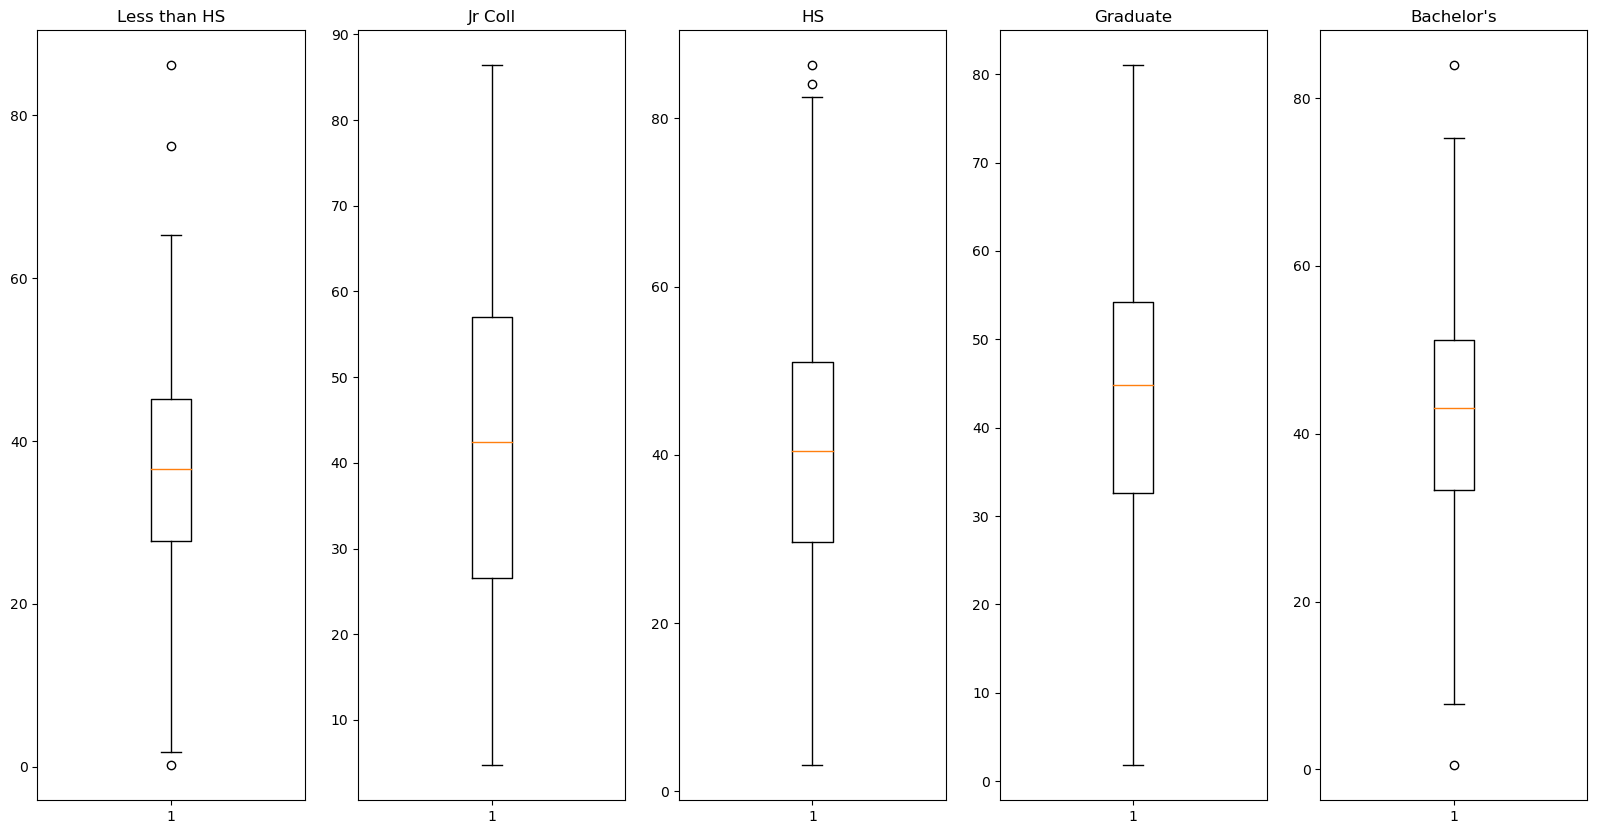

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.subplot(1,5,1)
plt.boxplot(class_A[class_A['Grades'].notnull()]['Grades'])
plt.title("Less than HS")
plt.subplot(1,5,2)
plt.boxplot(class_B[class_B['Grades'].notnull()]['Grades'])
plt.title("Jr Coll")
plt.subplot(1,5,3)
plt.boxplot(class_C[class_C['Grades'].notnull()]['Grades'])
plt.title("HS")
plt.subplot(1,5,4)
plt.boxplot(class_D[class_D['Grades'].notnull()]['Grades'])
plt.title("Graduate")
plt.subplot(1,5,5)
plt.boxplot(class_E[class_E['Grades'].notnull()]['Grades'])
plt.title("Bachelor's")
plt.show()


In [10]:
print(class_A.isnull().sum())
print(class_B.isnull().sum())
print(class_C.isnull().sum())
print(class_D.isnull().sum())
print(class_E.isnull().sum())

Level     0
Grades    2
dtype: int64
Level     0
Grades    1
dtype: int64
Level     0
Grades    5
dtype: int64
Level     0
Grades    2
dtype: int64
Level     0
Grades    1
dtype: int64


### All the classes seems to be normally distributed hence replace missing grades with the mean value from each class

In [11]:
class_A['Grades'].fillna(float(class_A['Grades'].mean()), inplace=True)
class_B['Grades'].fillna(float(class_B['Grades'].mean()), inplace=True)
class_C['Grades'].fillna(float(class_C['Grades'].mean()), inplace=True)
class_D['Grades'].fillna(float(class_D['Grades'].mean()), inplace=True)
class_E['Grades'].fillna(float(class_E['Grades'].mean()), inplace=True)
class_A['Grades'].isnull().sum()

0

In [12]:
print("Data Summary of Less Than HS class is\n", class_A.describe())
print("\nData Summary of Jr Coll class is\n",class_B.describe())
print("\nData Summary of HS class is\n",class_C.describe())
print("\nData Summary of Graduate Class is\n",class_D.describe())
print("\nData Summary of Bachelor Class is\n",class_E.describe())

Data Summary of Less Than HS class is
            Grades
count  121.000000
mean    36.600000
std     15.490572
min      0.200000
25%     27.900000
50%     36.600000
75%     45.000000
max     86.100000

Data Summary of Jr Coll class is
           Grades
count  97.000000
mean   41.004167
std    18.826969
min     4.700000
25%    26.800000
50%    42.000000
75%    57.000000
max    86.400000

Data Summary of HS class is
            Grades
count  546.000000
mean    40.123105
std     14.817857
min      3.100000
25%     29.825000
50%     40.123105
75%     50.900000
max     86.300000

Data Summary of Graduate Class is
            Grades
count  155.000000
mean    43.612418
std     14.967972
min      1.800000
25%     32.750000
50%     44.800000
75%     54.200000
max     81.000000

Data Summary of Bachelor Class is
            Grades
count  253.000000
mean    42.130556
std     13.454116
min      0.500000
25%     33.400000
50%     43.000000
75%     51.100000
max     83.900000


# Analysis results & Explanation 

From the above results and plots we can interpret the following
1. The dataset contains information about 1172 students from different levels, with the highest number of          students in      the HS group and the lowest number in the Jr coll group.
2. The box plots show that the groups "Less than HS", "HS", and "Bachelor's" have several outliers that are located far away        from the rest of the data points. These outliers could have a significant impact on the mean and standard deviation of the      respective groups.
3. The box plots also suggest that the data points in all the groups are dispersed in a similar way, except for the "Less than      HS" group, which has a relatively higher dispersion.
4. The median scores for all groups are relatively close, with the "HS" group having the highest median and the "Less than HS"      group having the lowest median.
5. The overall range of scores is from around 20 to 100, with the "Less than HS" group having the lowest maximum score and the     "Bachelor's" group having the highest maximum score.

In [13]:
df1.loc[(df1["Level"] == "Less than HS")]['Grades'].fillna(float(class_A['Grades'].mean()), inplace=True)
df1.loc[(df1["Level"] == "Less than HS")]['Grades'].isnull().sum()
#class_A['Grades'].fillna(float(class_A['Grades'].mean()), inplace=True)
df1.loc[(df1["Level"] == "Less than HS")]['Grades']

frames = [class_A, class_B, class_C, class_D, class_E]
df2 = pd.concat(frames)
data = df2

In [14]:
# Calculating the Mean of the groups & mean of the entire data set which we use for calculating the Sum of squares 

mean_class_A = np.mean(class_A['Grades'])
mean_class_B = np.mean(class_B['Grades'])
mean_class_C = np.mean(class_C['Grades'])
mean_class_D = np.mean(class_D['Grades'])
mean_class_E = np.mean(class_E['Grades'])

var_A = np.var(class_A['Grades'])
var_B = np.var(class_B['Grades'])
var_C = np.var(class_C['Grades'])
var_D = np.var(class_D['Grades'])
var_E = np.var(class_E['Grades'])

Total_Mean = np.mean(data['Grades'])

In [15]:
# Variablility between groups i.e. Sum of Squares of Groups & Sum of Squares with in groups & Sum of Squares of Totals

SSG = 121 * (Total_Mean - mean_class_A)**2 + 97 * (Total_Mean - mean_class_B)**2 + 546 * (Total_Mean - mean_class_C)**2 + 155 * (Total_Mean - mean_class_D)**2 + 253 * (Total_Mean - mean_class_E)**2
print("Sum of Squares of Groups is", SSG)
Sum_Grades = data['Grades']
SST = sum((Sum_Grades - Total_Mean)**2)
print("Sum of Squares of Total is", SST)
SSE = SST - SSG
print("Sum of Squares of Error is", SSE)

Sum of Squares of Groups is 4056.3352793361405
Sum of Squares of Total is 266661.49592311546
Sum of Squares of Error is 262605.1606437793


In [16]:
#Calculating the Mean of Sum of Squares with in groups & Sum of Squares of Groups
#Degree of Freedom of Groups = Total Number of Groups - 1
#Degree of Freedom with in Groups = Total Number of records - Degree of Freedom of groups

DF_G = 4
DF_E = 1168
MSG = SSG/DF_G
print("Mean of Sum of Squares of Groups is", SSG)
MSE = SSE/DF_E
print("Mean of Sum of Squares of Error is", SSE)
F_Statistics = MSG/MSE
print("The Calculated F Test Statistic is", F_Statistics)

Mean of Sum of Squares of Groups is 4056.3352793361405
Mean of Sum of Squares of Error is 262605.1606437793
The Calculated F Test Statistic is 4.510383187681695


In [35]:
#Pairwise comparison
#Since we have 5 groups, we will end up with 10 comparisions
k = 5
k = int((k*(k-1))/2)
print("The Total number of Group Comparisons are", k)

#Significane level for Bonferroni Correction
Alpha = 0.05/k
print("The stringent signficance level used for Group comparison is",Alpha)

The Total number of Group Comparisons are 10
The stringent signficance level used for Group comparison is 0.005


In [18]:
import scipy.stats

#Group 1 Comparision between Less than HS,Jr Coll
Z_Group1 = (mean_class_A - mean_class_B)/(np.sqrt(np.sum([np.var(class_A)/len(class_A),np.var(class_B)/len(class_B)])))
print("The Z Score between 'Less than HS' & 'Jr Coll' {} is & p-value is {}".format(Z_Group1,scipy.stats.norm.sf(abs(Z_Group1))))

#Group 2 Comparision between Less than HS,HS
Z_Group2 = (mean_class_A - mean_class_C)/(np.sqrt(np.sum([np.var(class_A)/len(class_A),np.var(class_C)/len(class_C)])))
print("The Z score between 'Less than HS' & 'HS' is {} is & p-value is {}".format(Z_Group2,scipy.stats.norm.sf(abs(Z_Group2))))


#Group 3 Comparision between Less than HS,Graduate
Z_Group3 = (mean_class_A - mean_class_D)/(np.sqrt(np.sum([np.var(class_A)/len(class_A),np.var(class_D)/len(class_D)])))
print("The Z score between 'Less than HS' & 'Graduate' {} is & p-value is {}".format(Z_Group3,scipy.stats.norm.sf(abs(Z_Group3))))


#Group 4 Comparision between Less than HS,Bachelor's
Z_Group4 = (mean_class_A - mean_class_E)/(np.sqrt(np.sum([np.var(class_A)/len(class_A),np.var(class_E)/len(class_E)])))
print("The Z score between 'Less than HS' & 'Bachelor' {} is & p-value is {}".format(Z_Group4,scipy.stats.norm.sf(abs(Z_Group4))))


#Group 5 Comparision between Jr Coll,HS
Z_Group5 = (mean_class_B - mean_class_C)/(np.sqrt(np.sum([np.var(class_B)/len(class_B),np.var(class_C)/len(class_C)])))
print("The Z score between 'Jr Coll' & 'HS' is {} & p-value is {}".format(Z_Group5,scipy.stats.norm.sf(abs(Z_Group5))))


#Group 6 Comparision between Jr Coll,Graduate
Z_Group6 = (mean_class_B - mean_class_D)/(np.sqrt(np.sum([np.var(class_B)/len(class_B),np.var(class_D)/len(class_D)])))
print("The Z score between 'Jr Coll' & 'Graduate' is {} & p-value is {}".format(Z_Group6,scipy.stats.norm.sf(abs(Z_Group6))))


#Group 7 Comparision between Jr Coll,Bachelor's
Z_Group7 = (mean_class_B - mean_class_E)/(np.sqrt(np.sum([np.var(class_B)/len(class_B),np.var(class_E)/len(class_E)])))
print("The Z score between 'Jr Coll' & 'Bachelor' is {} & p-value is {}".format(Z_Group7,scipy.stats.norm.sf(abs(Z_Group7))))


#Group 8 Comparision between HS,Graduate
Z_Group8 = (mean_class_C - mean_class_D)/(np.sqrt(np.sum([np.var(class_C)/len(class_C),np.var(class_D)/len(class_D)])))
print("The Z Score between 'HS' & 'Graduate' is {} & p-value is {}".format(Z_Group8,scipy.stats.norm.sf(abs(Z_Group8))))


#Group 9 Comparision between HS,Bachelor's
Z_Group9 = (mean_class_C - mean_class_E)/(np.sqrt(np.sum([np.var(class_C)/len(class_C),np.var(class_E)/len(class_E)])))
print("The Z Score between 'HS' & 'Bachelor' is {} & p-value is {}".format(Z_Group9,scipy.stats.norm.sf(abs(Z_Group9))))


#Group 10 Comparision between Graduate,Bachelor's
Z_Group10 = (mean_class_D - mean_class_E)/(np.sqrt(np.sum([np.var(class_D)/len(class_D),np.var(class_E)/len(class_E)])))
print("The Z Score between 'Graduate' & 'Bachelor' is {}  & p-value is {}".format(Z_Group10,scipy.stats.norm.sf(abs(Z_Group10))))


The Z Score between 'Less than HS' & 'Jr Coll' -1.863892338271134 is & p-value is 0.031168412446829215
The Z score between 'Less than HS' & 'HS' is -2.289402641352292 is & p-value is 0.011027984408969408
The Z score between 'Less than HS' & 'Graduate' -3.8014369833082697 is & p-value is 7.192966453759692e-05
The Z score between 'Less than HS' & 'Bachelor' -3.3787200457804816 is & p-value is 0.00036412063038768737
The Z score between 'Jr Coll' & 'HS' is 0.43954796990127626 & p-value is 0.3301322658017469
The Z score between 'Jr Coll' & 'Graduate' is -1.1603585108728531 & p-value is 0.12295143567042183
The Z score between 'Jr Coll' & 'Bachelor' is -0.5413616917053243 & p-value is 0.29412915313402566
The Z Score between 'HS' & 'Graduate' is -2.5741053148204243 & p-value is 0.005024983853484147
The Z Score between 'HS' & 'Bachelor' is -1.9019262375957142 & p-value is 0.028590399250083734
The Z Score between 'Graduate' & 'Bachelor' is 1.010919550186813  & p-value is 0.15602746805565432


In [19]:
from statsmodels.formula.api import ols
group = list(df2.iloc[:,0])
my_value = list(df2.iloc[:,-1])
my_model = ols(formula='my_value ~ group', data=df2)

In [20]:
my_model_fit = my_model.fit()
my_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               my_value   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.507
Date:                Thu, 20 Apr 2023   Prob (F-statistic):            0.00129
Time:                        10:54:48   Log-Likelihood:                -4834.4
No. Observations:                1172   AIC:                             9679.
Df Residuals:                    1167   BIC:                             9704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                42.1306      0.943     44.673      0.000      40.280      43.981
group[T.Graduate]         1.4819      1.530      0.968      0.333      -1.520       4.484
group[T.HS]              -2.0075      1.141     -1.760      0.079      -4.246       0.231
group[T.Jr Coll]         -1.1264      1.791     -0.629      0.530      -4.641       2.388
group[T.Less than HS]    -5.5306      1.658     -3.336      0.001      -8.784      -2.277
==============================================================================
Omnibus:                        0.353   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.421
Skew:                           0.033   Prob(JB):                        0.810
Kurtosis:                       2.935   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.api as sm
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                 sum_sq      df         F    PR(>F)
group       4056.335279     4.0  4.506522  0.001289
Residual  262605.160644  1167.0       NaN       NaN


In [22]:
esq_sm = anova_table['sum_sq'][0] / (anova_table['sum_sq'][1])
anova_table['Etasq'] = [esq_sm, 'NaN']
print(anova_table)

                 sum_sq      df         F    PR(>F)     Etasq
group       4056.335279     4.0  4.506522  0.001289  0.015447
Residual  262605.160644  1167.0       NaN       NaN       NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Bachelor's     Graduate   1.4819 0.8693  -2.6984  5.6622  False
Bachelor's           HS  -2.0075 0.3979  -5.1243  1.1094  False
Bachelor's      Jr Coll  -1.1264 0.9704  -6.0207  3.7679  False
Bachelor's Less than HS  -5.5306 0.0078 -10.0604 -1.0007   True
  Graduate           HS  -3.4893 0.0795  -7.2192  0.2406  False
  Graduate      Jr Coll  -2.6083 0.6643  -7.9141  2.6976  False
  Graduate Less than HS  -7.0124 0.0012 -11.9841 -2.0408   True
        HS      Jr Coll   0.8811 0.9839  -3.6347  5.3968  False
        HS Less than HS  -3.5231 0.1339   -7.641  0.5948  False
   Jr Coll Less than HS  -4.4042 0.1981  -9.9896  1.1812  False
---------------------------------------------------------------


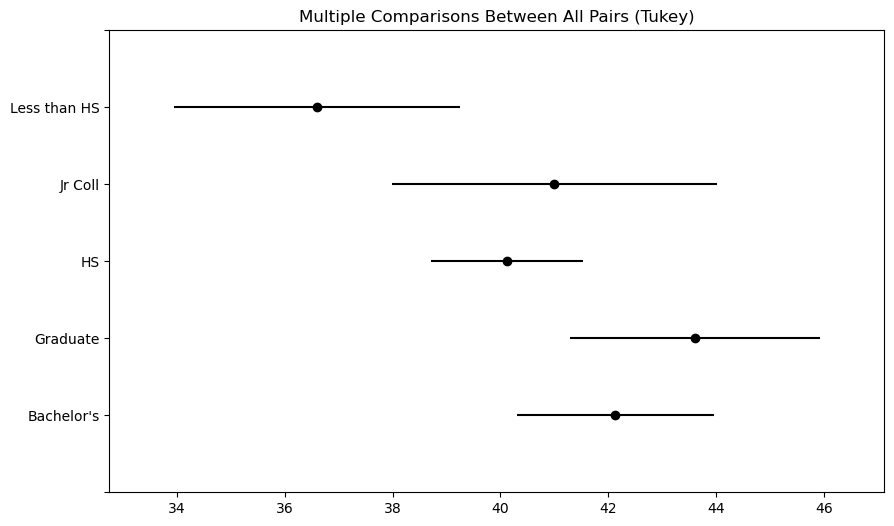

In [23]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df2['Grades'],groups=df2['Level'],alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

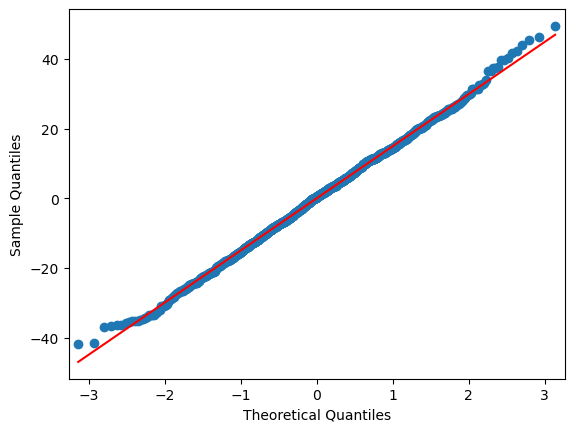

In [24]:
res = my_model_fit.resid
fig = sm.qqplot(res,line='s')

<AxesSubplot:ylabel='Density'>

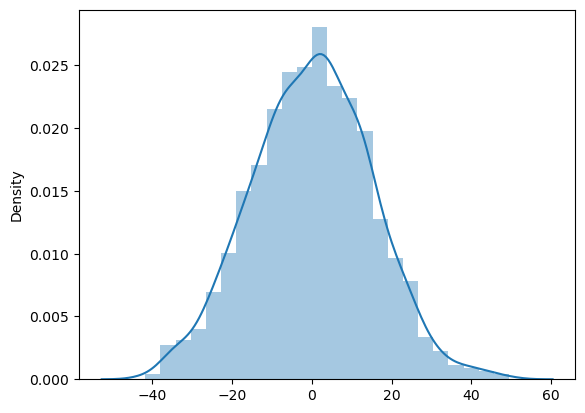

In [25]:
import seaborn as sns
sns.distplot(res,bins='auto',hist='True')

In [26]:
#Normality assumption check
from scipy import stats
w,pvalue = stats.shapiro(my_model_fit.resid)
print('pvalue: ',pvalue)

pvalue:  0.37860772013664246


In [27]:
# Two Way Anova Model

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols(formula='my_value ~ group', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               my_value   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.507
Date:                Thu, 20 Apr 2023   Prob (F-statistic):            0.00129
Time:                        10:54:54   Log-Likelihood:                -4834.4
No. Observations:                1172   AIC:                             9679.
Df Residuals:                    1167   BIC:                             9704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                42.1306      0.943     44.673      0.000      40.280      43.981
group[T.Graduate]         1.4819      1.530      0.968      0.333      -1.520       4.484
group[T.HS]              -2.0075      1.141     -1.760      0.079      -4.246       0.231
group[T.Jr Coll]         -1.1264      1.791     -0.629      0.530      -4.641       2.388
group[T.Less than HS]    -5.5306      1.658     -3.336      0.001      -8.784      -2.277
==============================================================================
Omnibus:                        0.353   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.421
Skew:                           0.033   Prob(JB):                        0.810
Kurtosis:                       2.935   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
anova_table = sm.stats.anova_lm(model,typ=2)
print(anova_table)

                 sum_sq      df         F    PR(>F)
group       4056.335279     4.0  4.506522  0.001289
Residual  262605.160644  1167.0       NaN       NaN


In [29]:
# Two-Way ANOVA: Assumptions checks
w,pvalue = stats.shapiro(model.resid)
print(pvalue)

0.37860772013664246


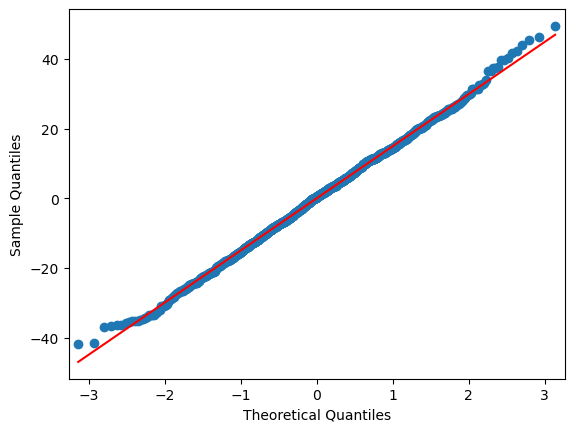

In [36]:
res = model.resid
fig = sm.qqplot(res,line='s')

<AxesSubplot:ylabel='Density'>

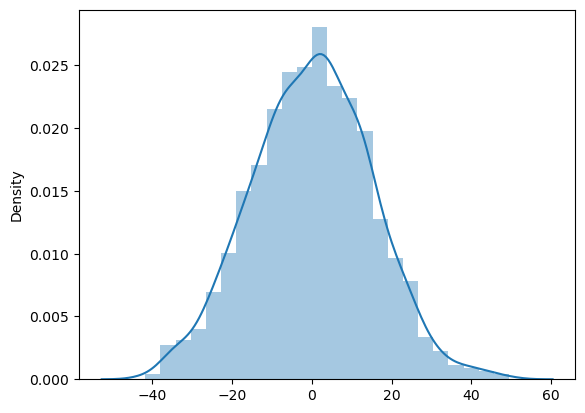

In [34]:
sns.distplot(res,bins='auto',hist=True)

## Conclusion

Based on the One Way Analysis conducted, we can conclude that there is a significant difference in the grades between certain groups of students. The null hypothesis that there is no significant difference in grades between the groups has been rejected for the following groups:

1. The grades of students in 'Jr Coll' are significantly different from those in 'HS' and 'Graduate'  and  'Bachelor'.
2. The grades of students in 'Graduate' are significantly different from those in 'Bachelor'.


However, for all other groups, the difference in grades was not significant, and we failed to reject the null hypothesis. Therefore, we can conclude that there are some significant differences in the grades of students across different educational groups, but not all group comparisons show a significant difference.